In [ ]:
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

## **Geochemical analysis of groundwater quality in California Central valley**

**Summary Statistics (Additive Log Transform of compositions) using CodaPack Software:**

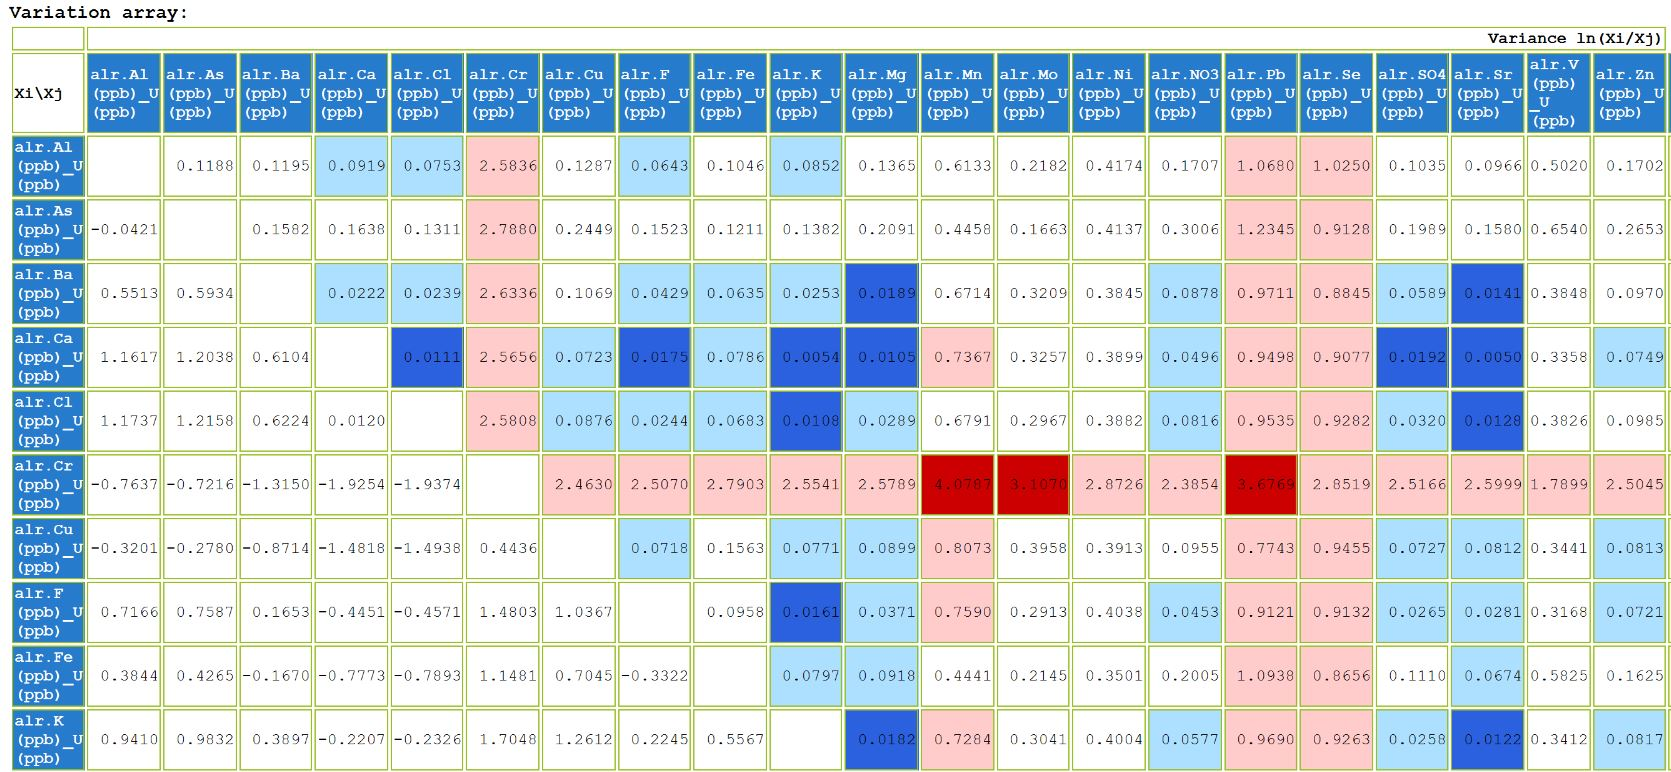

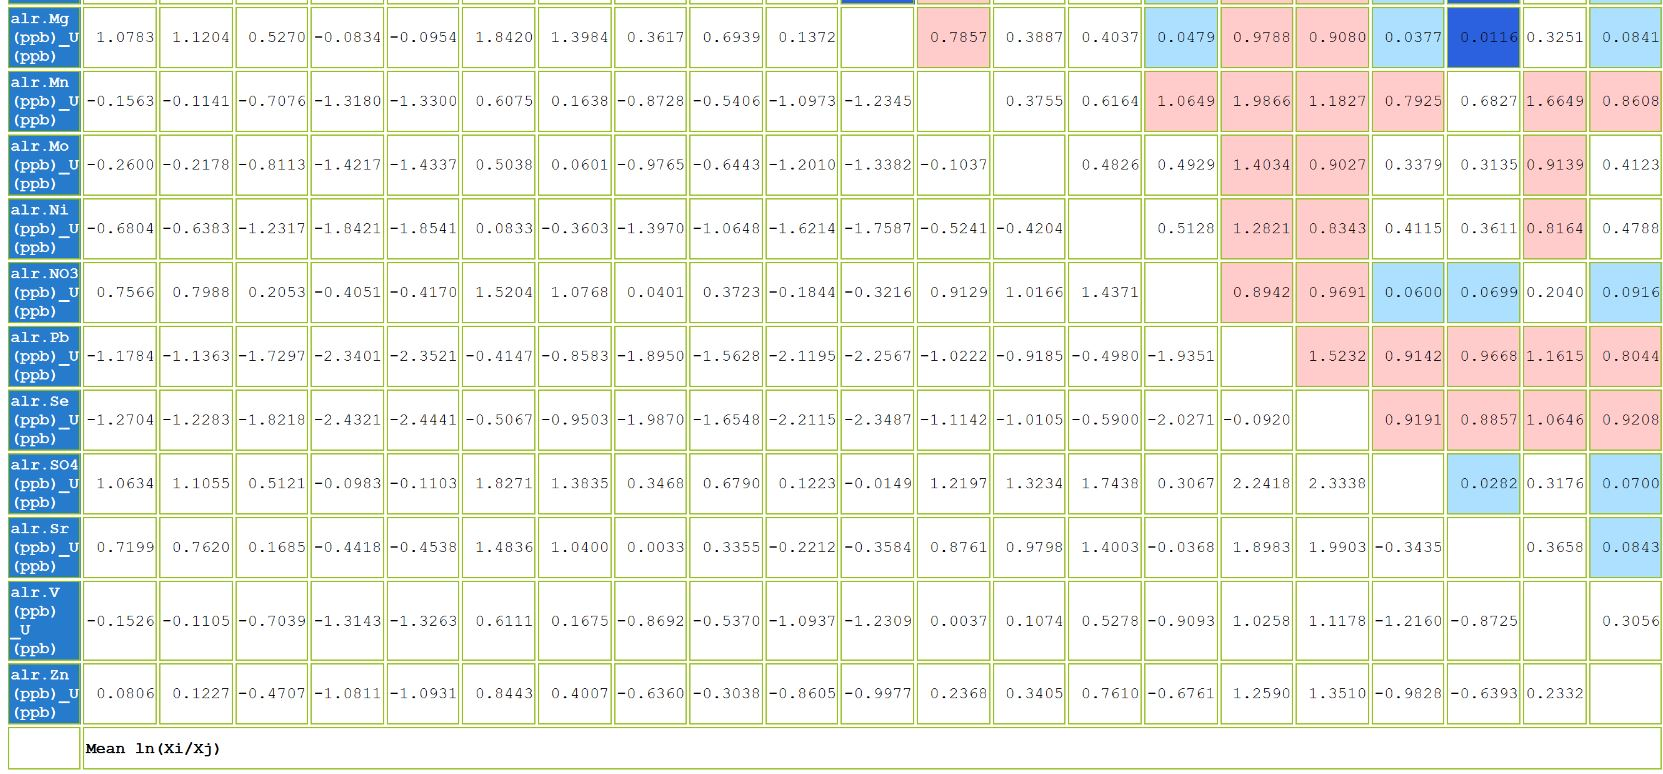

- As can be seen from the Variation Array above- Cr, Mn, and Pb seem to be the most interesting log-ratios because of their high variations across the constituents. 

**Ternary Diagram ( Cr, Pb, Mn) and Scatter plot (Pb, Mn) of important alr transformed log ratios:**

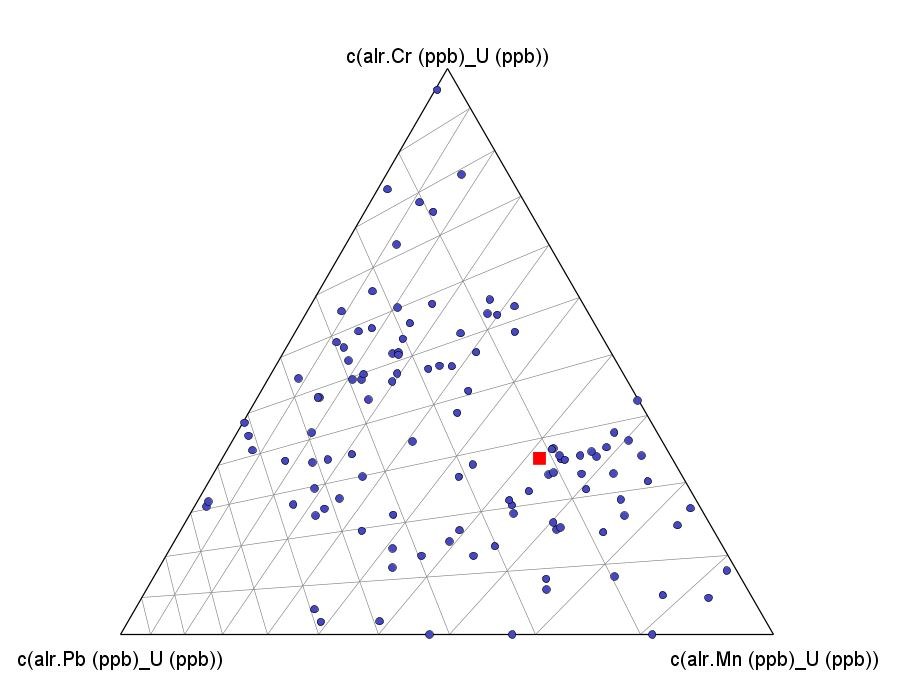

Text(0.5, 0, 'alr (Mn(ppb)/ U(ppb)')

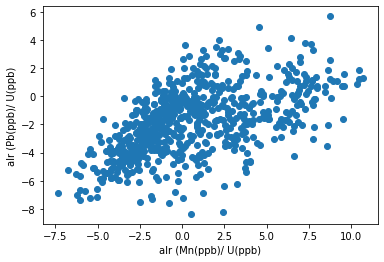

In [ ]:
GW = pd.read_csv('CV_alr file.csv')
Mn_U = GW['alr.Mn (ppb)_U (ppb)']
Pb_U = GW['alr.Pb (ppb)_U (ppb)']
plt.scatter(Mn_U, Pb_U)
plt.ylabel('alr (Pb(ppb)/ U(ppb)')
plt.xlabel('alr (Mn(ppb)/ U(ppb)')

- There seems to be a good linear correlation between alr transformed ratios of Pb and Mn, if we assume some data on the higher values of Mn to be outliers.

**Biplot:**

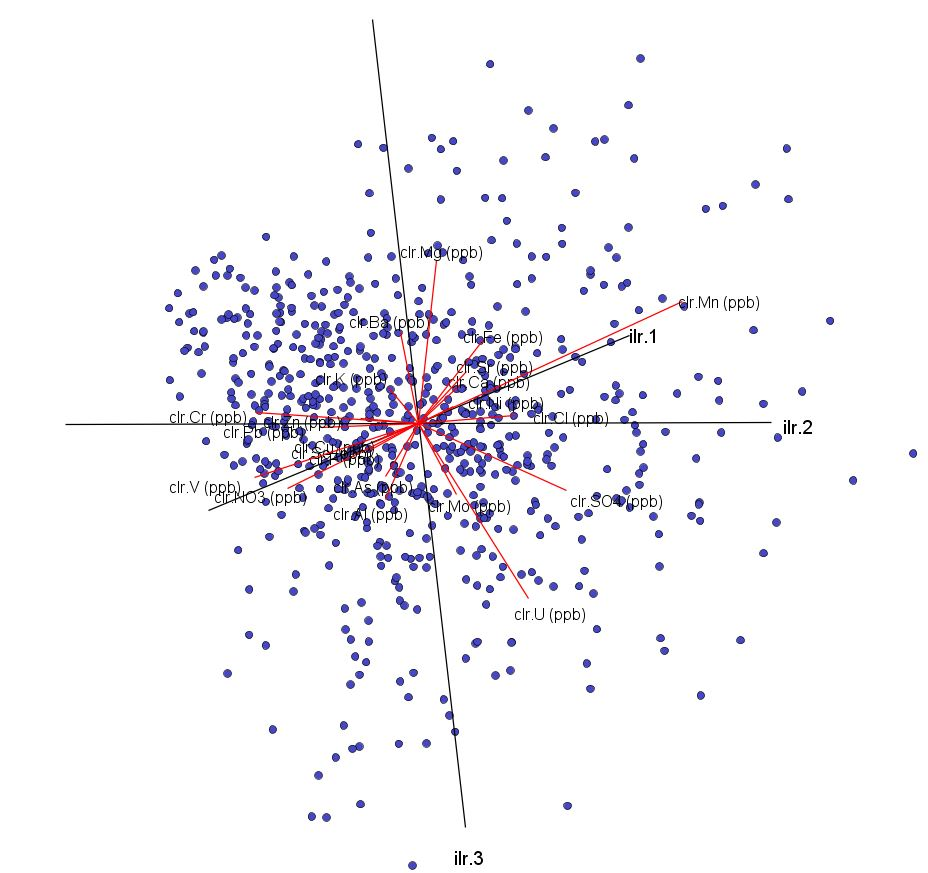

**Map:**

In [ ]:
## load compositional data analysis package
! pip install scikit-bio
from skbio.stats.composition import *


In [ ]:
## load Groundwater data
GW = pd.read_csv('Datapoints-CentralValley-Groundwater-Jan2019.csv')
GW_cons = GW.iloc[:,6:28]
col_name = GW_cons.columns
clr_cons = clr(GW_cons)
clr_cons = pd.DataFrame(clr_cons, columns = ['clr('+str(name) + ')' for name in col_name])
GW['clr_ Mn(ppb)'] = clr_cons['clr(Mn (ppb))']
GW['clr_ Fe(ppb)'] = clr_cons['clr(Fe (ppb))']

Text(0.5, 1.0, 'clr(Fe)(ppb)')

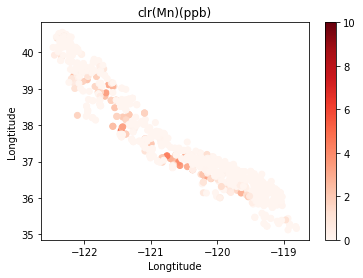

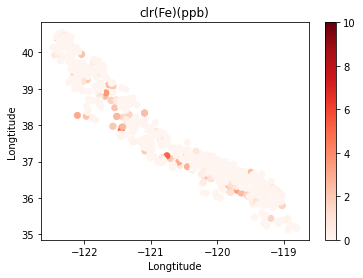

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(GW['Longitude'],GW['Latitude'],c = GW['clr_ Mn(ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar()
plt.xlabel('Longtitude')
plt.ylabel('Longtitude')
plt.title('clr(Mn)(ppb)')

plt.figure()
plt.scatter(GW['Longitude'],GW['Latitude'],c = GW['clr_ Fe(ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar()
plt.xlabel('Longtitude')
plt.ylabel('Longtitude')
plt.title('clr(Fe)(ppb)')

- In the biplot of clr transformed data, we can see that certain constituent pairs like Mg & Mn, and SO4 & NO3 have almost no correlations due to the perpendicularity of their respective axes. Similarly, constituents like Fe and Mn seem to have high positive correlation due to the low angle between their axes.

- The hypothesis drawn from the clr transformed biplot that Fe & Mn are strongly positively correlation can be tested in the maps above. As can be seen from the maps, the hypothesis is confirmed because the high and low values of Fe and Mn are observed at same locations. The maps also show that the high and low values of constituents are clustered (high values mostly on the western border) and not random. Therefore, the high values of Fe and Pb are likley sourced from anthropogenic events.

# **Groundwater Compositions K-means Clustering**

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
## load Groundwater data
GW = pd.read_csv('Datapoints-CentralValley-Groundwater-Jan2019.csv')
GW_elems = GW.iloc[:,6:28]


**Rawdata (without CODA):**

In [ ]:
# define cluster number and perform k-means clustering 
cluster_num = 3
kmeans = KMeans(n_clusters=cluster_num, random_state=10).fit(GW_elems)
## get clustering labels
GW['kmeans_label'] = kmeans.labels_
## get cluster centers
cluster_center = kmeans.cluster_centers_
np.unique(GW['kmeans_label'], return_counts=True)

(array([0, 1, 2], dtype=int32), array([647,   4,  32]))

In [ ]:
#Using raw data with only Cr, U, SO4:

In [ ]:
GW_elems1 = GW[['Cr (ppb)','U (ppb)','SO4 (ppb)'] ]

In [ ]:
# define cluster number and perform k-means clustering 
cluster_num = 3

kmeans1 = KMeans(n_clusters=cluster_num, random_state=10).fit(GW_elems1)
## get clustering labels
GW['kmeans1_label'] = kmeans1.labels_
## get cluster centers
cluster_center = kmeans1.cluster_centers_
np.unique(GW['kmeans1_label'], return_counts=True)

(array([0, 1, 2], dtype=int32), array([639,  42,   2]))

Text(0.5, 1.0, 'K-means clustering with Cr, U, and SO4')

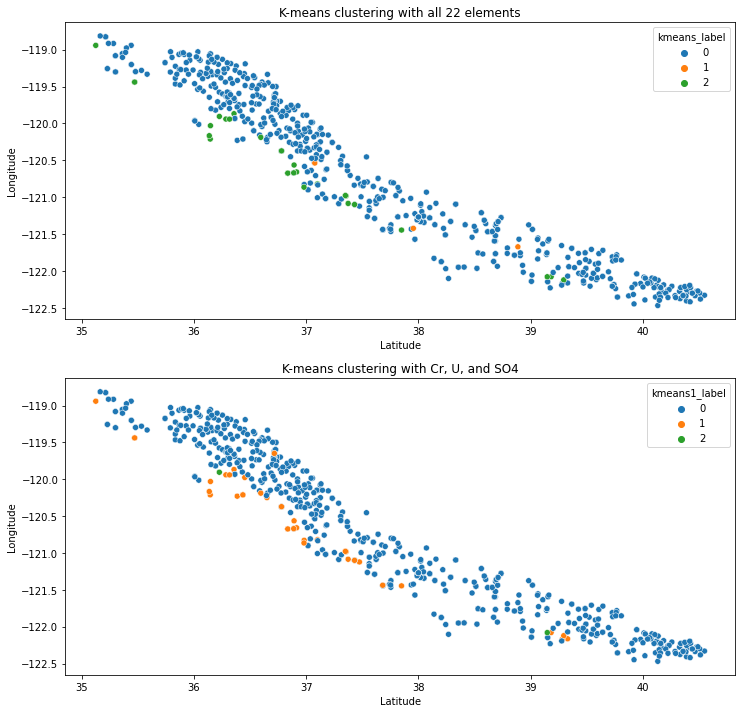

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(211)
sns.scatterplot(data= GW, x=GW['Latitude'], y=GW['Longitude'], sizes=70,
                hue="kmeans_label", palette="tab10")
plt.title('K-means clustering with all 22 elements')


plt.subplot(212)
sns.scatterplot(data= GW, x=GW['Latitude'], y=GW['Longitude'], sizes=70,
                hue="kmeans1_label", palette="tab10")
plt.title('K-means clustering with Cr, U, and SO4')


**CLR transformed data (with CODA):**

In [ ]:
## load compositional data analysis package
! pip install scikit-bio
from skbio.stats.composition import *

In [ ]:
columns_name2 = GW_elems.columns
clr_data = clr(GW_elems)
clr_data = pd.DataFrame(clr_data, columns = ['clr('+str(name) + ')' for name in columns_name2])


In [ ]:
# define cluster number and perform k-means clustering 
cluster_num = 3

kmeans2 = KMeans(n_clusters=cluster_num, random_state=10).fit(clr_data)
## get clustering labels
GW['kmeans2_label'] = kmeans2.labels_
## get cluster centers
cluster_center = kmeans2.cluster_centers_
np.unique(GW['kmeans2_label'], return_counts=True)

(array([0, 1, 2], dtype=int32), array([281, 176, 226]))

In [ ]:
# define cluster number and perform k-means clustering 
cluster_num = 3

kmeans3 = KMeans(n_clusters=cluster_num, random_state=10).fit(clr_data[['clr(Cr (ppb))','clr(U (ppb))','clr(SO4 (ppb))']])
## get clustering labels
GW['kmeans3_label'] = kmeans3.labels_
## get cluster centers
cluster_center = kmeans3.cluster_centers_
np.unique(GW['kmeans3_label'], return_counts=True)

(array([0, 1, 2], dtype=int32), array([286, 153, 244]))

Text(0.5, 1.0, 'K-means clustering with Cr, U, and SO4 after CLR transformation')

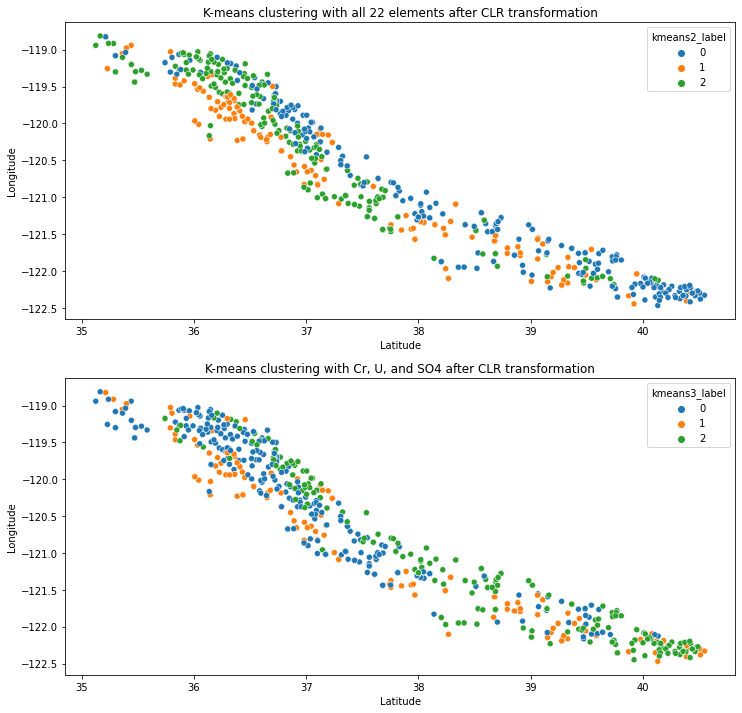

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(211)
sns.scatterplot(data= GW, x=GW['Latitude'], y=GW['Longitude'], sizes=70,
                hue="kmeans2_label", palette="tab10")

plt.title('K-means clustering with all 22 elements after CLR transformation')

plt.subplot(212)
sns.scatterplot(data= GW, x=GW['Latitude'], y=GW['Longitude'], sizes=70,
                hue="kmeans3_label", palette="tab10")
plt.title('K-means clustering with Cr, U, and SO4 after CLR transformation')


**Observations:**
- We can definitey observe a significant difference in the sizes of clusters when the data is raw Vs. when data is CLR transformed. The sizes of the k-means clusters- 0,1,2 change from [647,   4,  32] to [281, 176, 226] after CLR transformation when using all 22 elements. That is because the raw compositional data ranges from 0 to 1 which limits the variation in Euclidian distances between the cluster centers and the data points. Whereas, when the data is CLR transformed, the values can range from -inf to +inf which allows for a much larger variation in the distances and therefore- clearer divisions of data points amongst the clusters can be observed.

- Cluster labels 1 and 2 seem to differ the most in sizes when using all consituents Vs. using only the 3 constituents- both in CLR transformed and raw data (Summary Table of cluster sizes shown below). Also- in CLR transformed data, all cluster locations- 0,1,2 seem to be relatively unchanged, whereas the locations seem to change for clusters 1 and 2 in raw data.



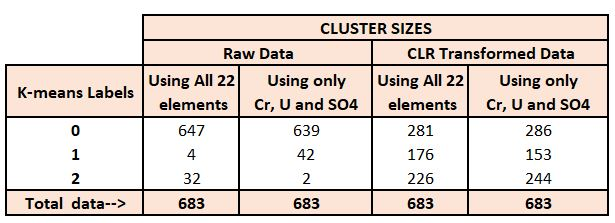